# Imports

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Acquiring Data

In [6]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [7]:
lemonade = pd.read_csv(url)

In [8]:
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [62]:
lemonade.shape

(365, 7)

# Prepare

In [76]:
# lowercase columns
lemonade.columns = lemonade.columns.str.lower()
# set date as index
pd.to_datetime(lemonade.date)
lemonade.set_index('date')
# dropping categorical columns for univariate analysis
distro = lemonade.drop(columns=['date','day'])

/var/folders/wb/wwwwrt7x1wq_f6x4zcw6qnlr0000gn/T/ipykernel_93350/143083773.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(lemonade.date)


# Explore Distributions

Distributions of Column: temperature


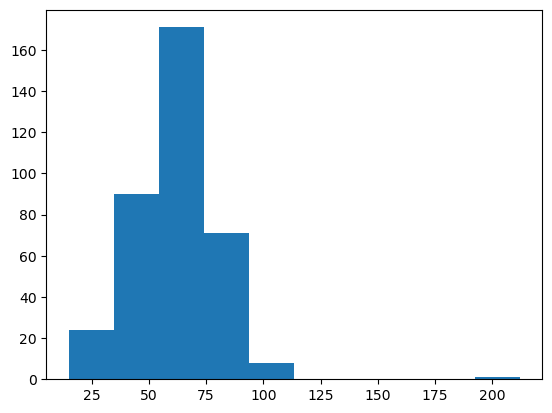

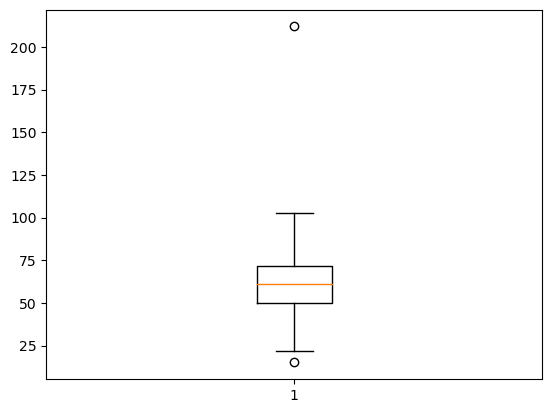

Distributions of Column: rainfall


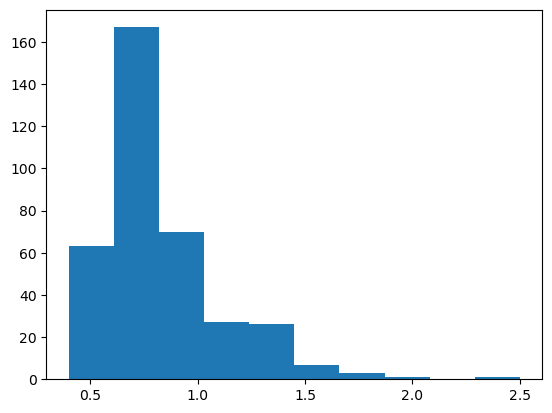

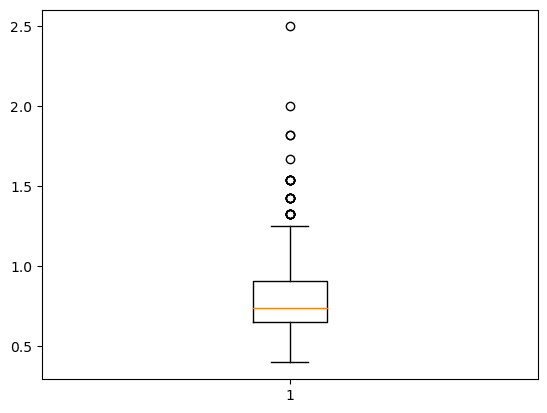

Distributions of Column: flyers


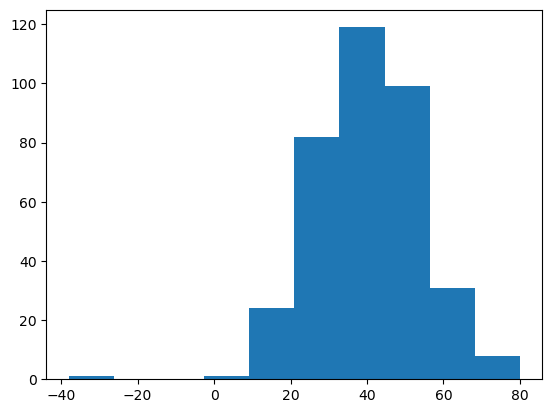

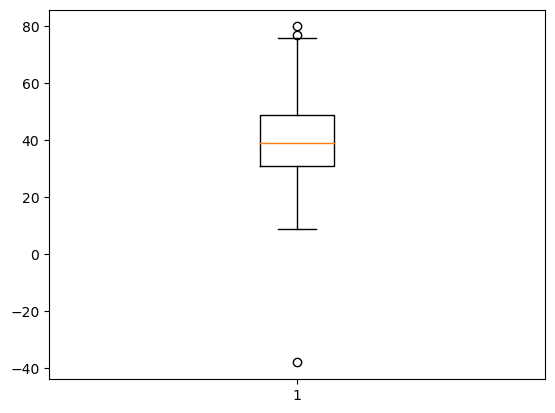

Distributions of Column: price


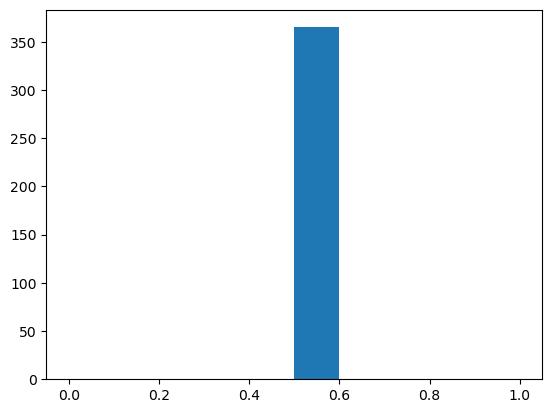

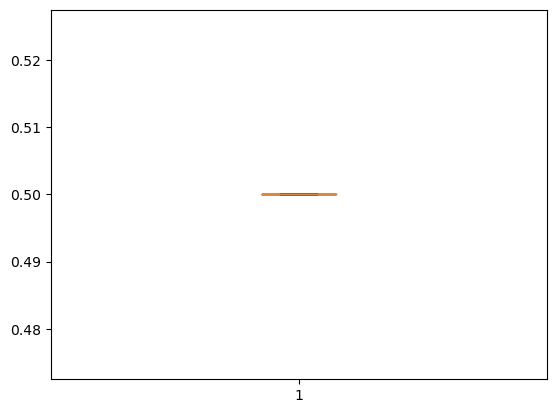

Distributions of Column: sales


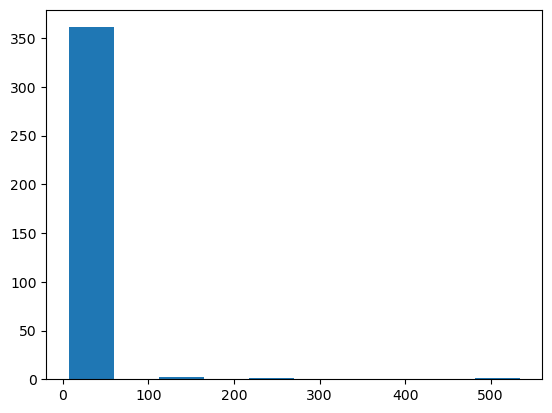

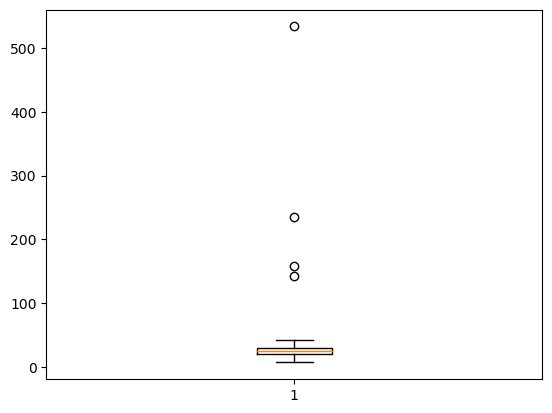

In [29]:
for col in distro.columns:
    print(f'Distributions of Column: {col}')
    plt.hist(distro[col])
    plt.show()
    plt.boxplot(distro[col])
    plt.show()
    

## Checking IQR Fences

## 1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
    - These outliers should not be dropped - until further analysis can be conducted
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
    - These outliers should not be dropped - until further analysis can be conducted
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


In [32]:
def get_fences(df,col, k=1.5):
	'''
	When retrieving fences it is important to note that there is a multiplier
	'''
	q1 = df[col].quantile(.25)
	q3 = df[col].quantile(.75)
	iqr = q3 - q1
	lower_fence, upper_fence = (q1 - (k*iqr)), (q3 - (k*iqr))
	return lower_fence, upper_fence

In [37]:
# Fences with K of 1.5
for col in distro.columns:
    print(f'Fences of Column: {col}')
    lower_fence, upper_fence = get_fences(df=distro,col=col,k=1.5)
    print(f'Lower fence: {lower_fence}, Upper fence: {upper_fence}')

Fences of Column: temperature
Lower fence: 16.700000000000003, Upper fence: 38.7
Fences of Column: rainfall
Lower fence: 0.26, Upper fence: 0.52
Fences of Column: flyers
Lower fence: 4.0, Upper fence: 22.0
Fences of Column: price
Lower fence: 0.5, Upper fence: 0.5
Fences of Column: sales
Lower fence: 5.0, Upper fence: 15.0


In [38]:
# Fences with K of 3
for col in distro.columns:
    print(f'Fences of Column: {col}')
    lower_fence, upper_fence = get_fences(df=distro,col=col,k=3)
    print(f'Lower fence: {lower_fence}, Upper fence: {upper_fence}')
    if lower_fence > distro.col:
        distro.drop()

Fences of Column: temperature
Lower fence: -16.299999999999997, Upper fence: 5.700000000000003
Fences of Column: rainfall
Lower fence: -0.13, Upper fence: 0.13
Fences of Column: flyers
Lower fence: -23.0, Upper fence: -5.0
Fences of Column: price
Lower fence: 0.5, Upper fence: 0.5
Fences of Column: sales
Lower fence: -10.0, Upper fence: 0.0


## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

- Do these make sense?
    - Most of these do make sense.
    
- Should certain outliers be kept or removed?
    - For now they should be kept until further analysis

In [64]:
# temperature and flyers are normally distributed

norm_dist = lemonade[['temperature','flyers']]

for col in norm_dist.columns:
    print(f'Z-Scores over 3 for: {col}')
    print(norm_dist[col][((norm_dist[col] - norm_dist[col].mean()) / norm_dist[col].std()).abs() > 2])

Z-Scores over 3 for: temperature
41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: temperature, dtype: float64
Z-Scores over 3 for: flyers
166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: flyers, dtype: int64


Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv.
- These should be removed

In [65]:
# temperature and flyers are normally distributed
# Likely due to incorrect input
norm_dist = lemonade[['temperature','flyers']]

for col in norm_dist.columns:
    print(f'Z-Scores over 3 for: {col}')
    print(norm_dist[col][((norm_dist[col] - norm_dist[col].mean()) / norm_dist[col].std()).abs() > 3])

Z-Scores over 3 for: temperature
41    212.0
Name: temperature, dtype: float64
Z-Scores over 3 for: flyers
324   -38
Name: flyers, dtype: int64


In [69]:
lemonade_ = lemonade.drop([lemonade.index[41], lemonade.index[324]])  


In [70]:
lemonade_

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13
